# Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

## Loading data

In [4]:
consumption= pd.read_pickle('../Data_Cleaned/consumption.pkl')
generation= pd.read_pickle('../Data_Cleaned/generation.pkl')
installed= pd.read_pickle('../Data_Cleaned/installed.pkl')
price= pd.read_pickle('../Data_Cleaned/price.pkl')

## Amount of Data

In [5]:
cols= ['Electricity Consumption','Electricity Generation','Capacity Installed','Electricity Price']
data_counts=[[len(consumption)],[len(generation)],[len(installed)],[len(price)]]
count_df=pd.DataFrame(data=dict(zip(cols,data_counts)))

In [6]:
print()
for a,b in zip(cols,data_counts):
    print('Available Data in >>>',a,'<<< Dataset is:',b[0])


Available Data in >>> Electricity Consumption <<< Dataset is: 175296
Available Data in >>> Electricity Generation <<< Dataset is: 175296
Available Data in >>> Capacity Installed <<< Dataset is: 6
Available Data in >>> Electricity Price <<< Dataset is: 43704


**Please Not that:**

* All these data are recorded between 2015 and 2019
* Electricity Consumption and Electricity Generation Datasets are recorded every 15 minutes
* Capacity Installed Dataset is recorded yearly
* Electricity Price Dataset is recorded hourly



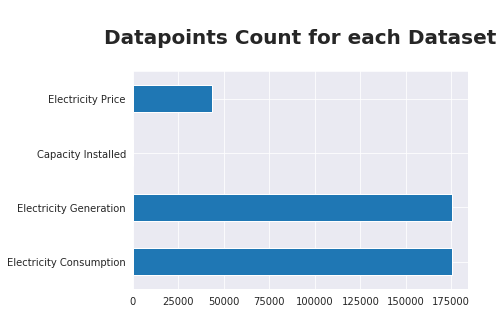

In [7]:
count_df.T.plot(kind='barh', legend=False)
plt.title('\nDatapoints Count for each Dataset\n', fontsize=20 ,fontweight='bold')
plt.show()

## Set Timeseries

In [8]:
dfs=[consumption,generation,installed,price]
for df in dfs:
    df.set_index('timestamp', inplace=True)

## Explore Data

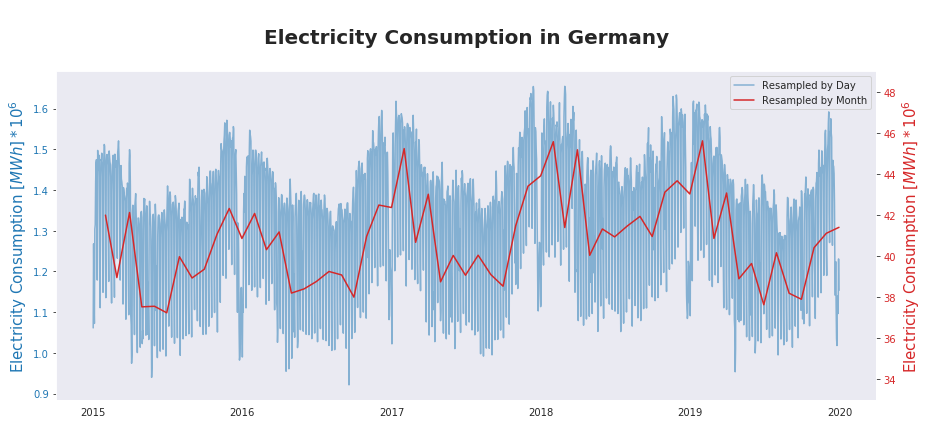

In [9]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=(13,6))
plt.title('\nElectricity Consumption in Germany\n', fontsize=20 ,fontweight='bold')

color = 'tab:blue'
ax1.set_ylabel(r'Electricity Consumption $[MWh]*10^6$', color=color, fontsize=15)
p1= ax1.plot(consumption.resample('D').sum()/(10**6), label='Resampled by Day', color=color, alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel(r'Electricity Consumption $[MWh]*10^6$', color=color, fontsize=15)
p2= ax2.plot(consumption.resample('M').sum()/(10**6), label='Resampled by Month', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim([33,49])

lines = [p1[0], p2[0]]
ax1.legend(lines, [l.get_label() for l in lines])

fig.tight_layout()
plt.show()

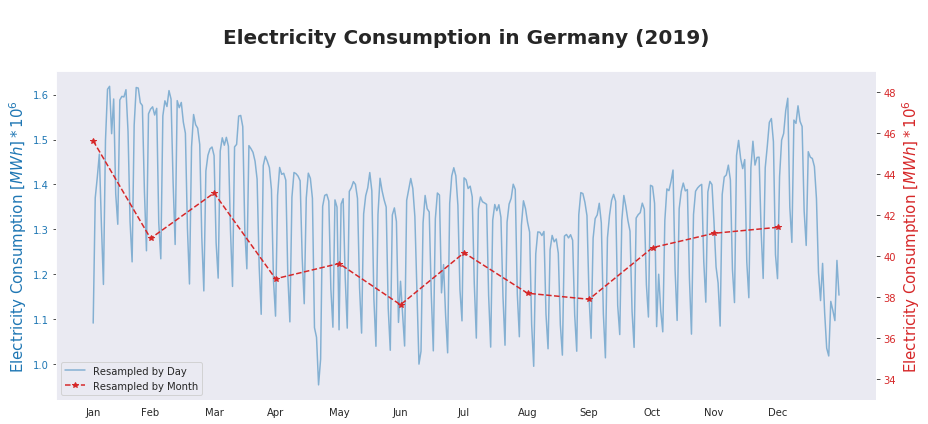

In [10]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=(13,6))
plt.title('\nElectricity Consumption in Germany (2019)\n', fontsize=20 ,fontweight='bold')

color = 'tab:blue'
ax1.set_ylabel(r'Electricity Consumption $[MWh]*10^6$', color=color, fontsize=15)
p1= ax1.plot(consumption['2019-01-01':'2019-12-31'].resample('D').sum()/(10**6), 
             label='Resampled by Day', color=color, alpha=0.5)
# plt.xticks(consumption['2019-01-01':'2019-12-31'].resample('M').sum().index.strftime('%b').tolist())

ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel(r'Electricity Consumption $[MWh]*10^6$', color=color, fontsize=15)

monthly_index= consumption['2019-01-01':'2019-12-31'].resample('M').sum().index-pd.to_timedelta(30,unit='days')
monthly=(consumption['2019-01-01':'2019-12-31'].resample('M').sum()/(10**6))['Electricity Consumption [MWh]'].values
p2= ax2.plot(monthly_index,monthly,'*--',label='Resampled by Month', color=color)

ax2.tick_params(axis='y', labelcolor=color)
plt.ylim([33,49])
lines = [p1[0], p2[0]]
ax1.legend(lines, [l.get_label() for l in lines])

xticks_location=date2num(monthly_index)
ax1.xaxis.set_major_locator(plt.FixedLocator(xticks_location))
ax1.xaxis.set_ticklabels(consumption['2019-01-01':'2019-12-31'].resample('M').sum().index.strftime('%b'))

fig.tight_layout()
plt.show()

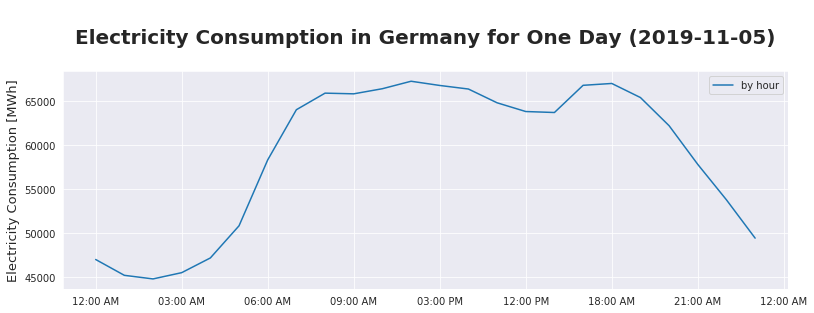

In [11]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(13,4))
plt.title('\nElectricity Consumption in Germany for One Day (2019-11-05)\n', fontsize=20 ,fontweight='bold')
plt.plot(consumption['2019-11-05':'2019-11-05'].resample('H').sum(), label='by hour')
ax.xaxis.set_ticklabels(['12:00 AM','03:00 AM','06:00 AM','09:00 AM','03:00 PM',
                         '12:00 PM','18:00 AM','21:00 AM','12:00 AM'])
plt.ylabel('Electricity Consumption [MWh]',fontsize=13)
plt.legend()
plt.show()

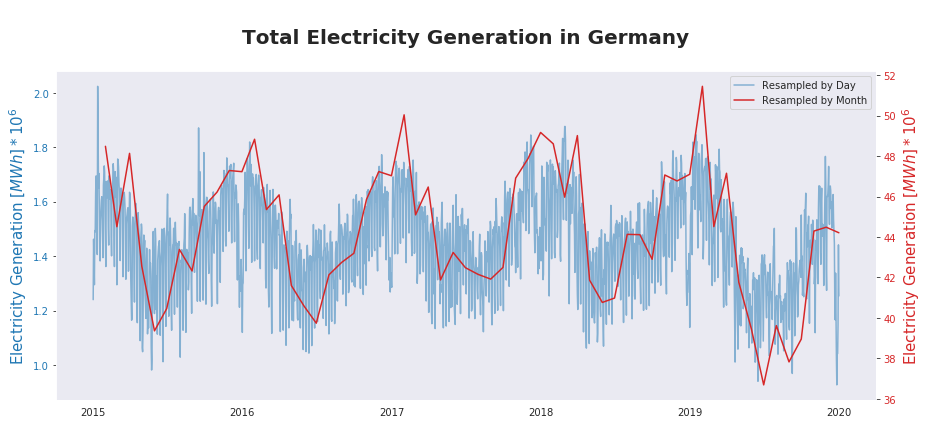

In [12]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=(13,6))
plt.title('\nTotal Electricity Generation in Germany\n', fontsize=20 ,fontweight='bold')

color = 'tab:blue'
ax1.set_ylabel(r'Electricity Generation $[MWh]*10^6$', color=color, fontsize=15)
p1= ax1.plot(generation.sum(axis=1).resample('D').sum()/(10**6), label='Resampled by Day', color=color, alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel(r'Electricity Generation $[MWh]*10^6$', color=color, fontsize=15)
p2= ax2.plot(generation.sum(axis=1).resample('M').sum()/(10**6), label='Resampled by Month', color=color)
ax2.tick_params(axis='y', labelcolor=color)

lines = [p1[0], p2[0]]
ax1.legend(lines, [l.get_label() for l in lines])

fig.tight_layout()
plt.show()

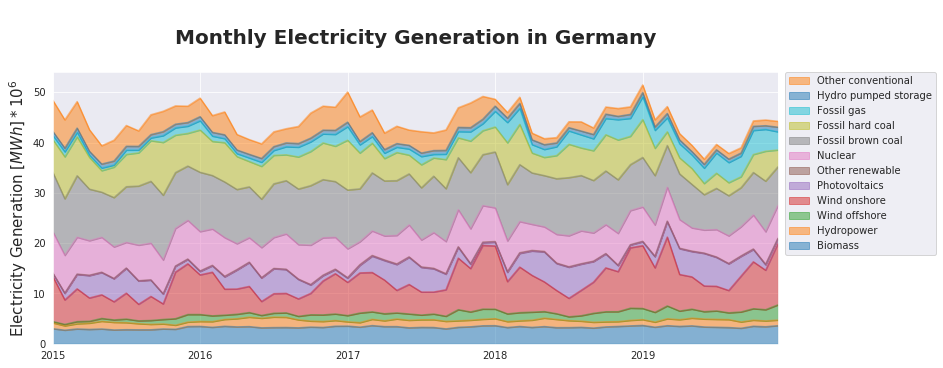

In [13]:
sns.set_style('darkgrid')

fig= plt.figure()
ax = fig.add_subplot(111)

(generation.resample('M').sum()/(10**6)).plot(kind='area', stacked=True, figsize=(13,5), alpha=0.5, ax=ax)

handles, labels = ax.get_legend_handles_labels()

ax.legend(reversed(handles), reversed([i[:-6] for i in  labels]), 
          loc='upper left', bbox_to_anchor=(1.01, 1),  borderaxespad=0.)

plt.title('\nMonthly Electricity Generation in Germany\n', fontsize=20 ,fontweight='bold')
plt.ylabel(r'Electricity Generation $[MWh]*10^6$', fontsize=15)
plt.xlabel('')
plt.show()

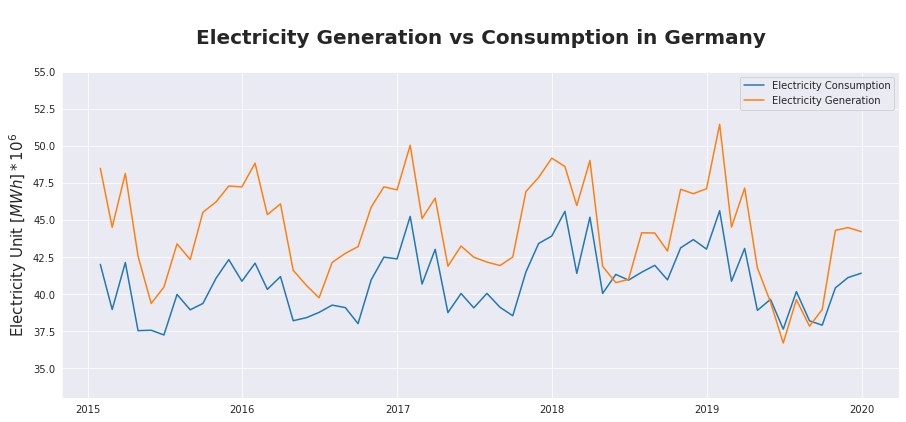

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
plt.plot(consumption.resample('M').sum()/(10**6), label='Electricity Consumption')
plt.plot(generation.sum(axis=1).resample('M').sum()/(10**6), label='Electricity Generation')
plt.title('\nElectricity Generation vs Consumption in Germany\n', fontsize=20 ,fontweight='bold')
plt.ylabel(r'Electricity Unit $[MWh]*10^6$', fontsize=15)
plt.ylim([33,55])
plt.xlabel('')
plt.legend(loc='upper right')
plt.show()

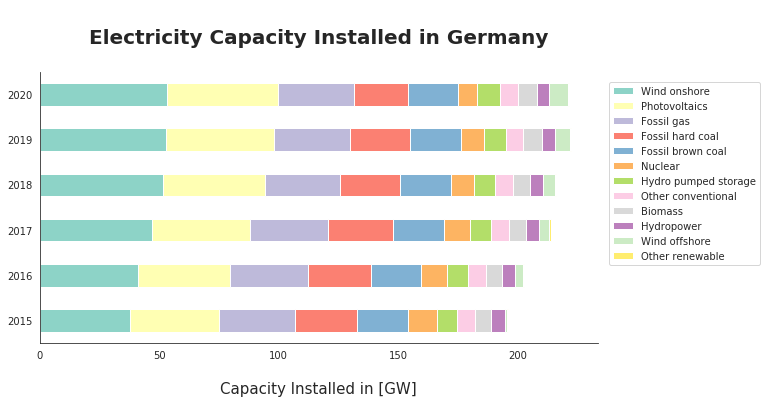

In [15]:
sns.set_style('white')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('\nElectricity Capacity Installed in Germany\n', fontsize=20 ,fontweight='bold')

(installed/1000).T.sort_values(by='2015-01-01', ascending=False).T.plot(kind='barh',
                                                                 stacked=True, 
                                                                 colormap='Set3',
                                                                 figsize=(10,5),
                                                                 ax=ax)

lng_labels= installed.T.sort_values(by='2015-01-01', ascending=False).T.columns.tolist()
ax.yaxis.set_ticklabels(installed.index.strftime('%Y'))
plt.ylabel('')
plt.legend(labels=[i[:-5] for i in lng_labels] ,loc='upper left', bbox_to_anchor=(1.02, 0.96),  borderaxespad=0.)
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
plt.xlabel('\nCapacity Installed in [GW]', fontsize=15)
plt.show()

In [16]:
renewables= installed.loc['2020-01-01'][['Biomass [MW]','Hydropower [MW]','Wind offshore [MW]',
                                         'Wind onshore [MW]','Photovoltaics [MW]','Other renewable [MW]']].sum()
print('\nTotal net nominal capacity:', installed.loc['2020-01-01'].sum()/1000,'[GW]')
print('Of which renewable energy sources:', renewables/1000, '[GWH]\n')



Total net nominal capacity: 221.584 [GW]
Of which renewable energy sources: 121.219 [GWH]



In [17]:
installed_compare= installed[['Wind offshore [MW]','Wind onshore [MW]',
                              'Photovoltaics [MW]', 'Fossil brown coal [MW]', 
                              'Fossil hard coal [MW]','Fossil gas [MW]']].copy()

installed_compare['Wind Energy']=installed_compare['Wind offshore [MW]']+installed_compare['Wind onshore [MW]']
installed_compare['Fossil Energy']=installed_compare[['Fossil brown coal [MW]','Fossil hard coal [MW]',
                                                      'Fossil gas [MW]']].sum(axis=1)
installed_compare['Solar Energy']= installed_compare['Photovoltaics [MW]']
installed_compare=installed_compare[['Wind Energy','Fossil Energy','Solar Energy']]

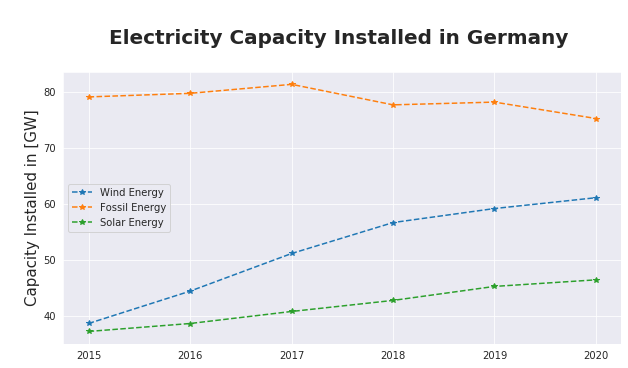

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.plot((installed_compare/1000),'*--')
plt.title('\nElectricity Capacity Installed in Germany \n', fontsize=20 ,fontweight='bold')
plt.xlabel('')
plt.ylabel('\nCapacity Installed in [GW]', fontsize=15)
plt.legend(labels=installed_compare.columns,loc='center left')
plt.show()

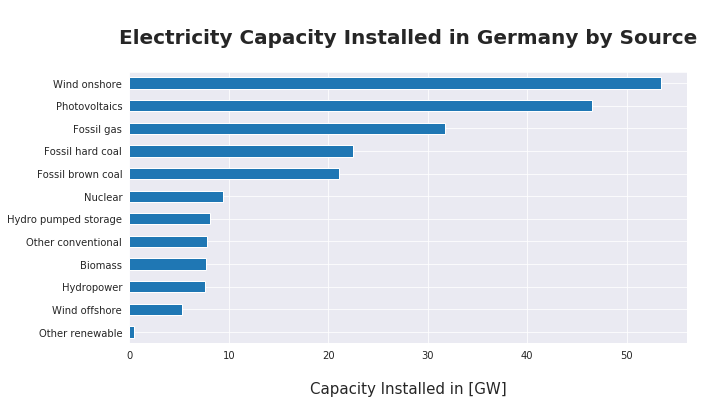

In [19]:
sns.set_style('darkgrid')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('\nElectricity Capacity Installed in Germany by Source\n', fontsize=20 ,fontweight='bold')
(installed.loc['2020-01-01']/1000).sort_values().plot(kind='barh', stacked=True, color='tab:blue', figsize=(10,5))
ax.yaxis.set_ticklabels([i[:-5] for i in installed.sum().sort_values().index.tolist()])
plt.xlabel('\nCapacity Installed in [GW]', fontsize=15)
plt.show()

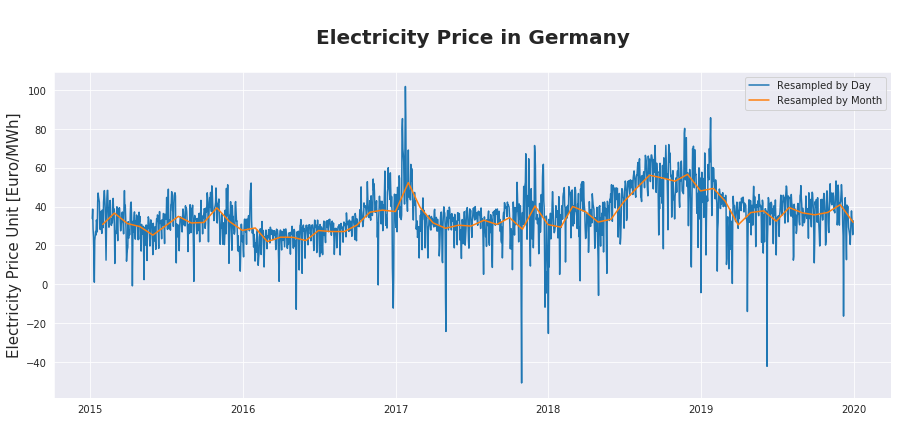

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
plt.plot(price.resample('D').mean(), label='Resampled by Day')
plt.plot(price.resample('M').mean() , label='Resampled by Month')
plt.title('\nElectricity Price in Germany\n', fontsize=20 ,fontweight='bold')
plt.ylabel('Electricity Price Unit [Euro/MWh]', fontsize=15)
plt.xlabel('')
plt.legend(loc='upper right')
plt.show()

In [33]:
df=pd.concat([generation.sum(axis=1).to_frame('Electricity Generation [MWh]'),consumption], axis=1)

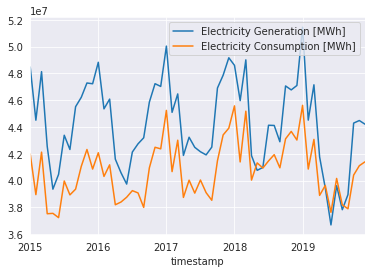

In [37]:
df.resample('M').sum().plot()